**Classifying Muffins and Cupcakes with SVM**

__Step 1:__ Import Packages

In [2]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

__Step 2:__ Import Data

In [3]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


__Step 3:__ Prepare the Data

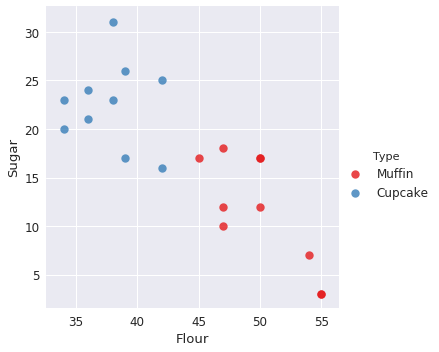

In [4]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [9]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)
# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

__Step 4:__ Fit the Model

In [12]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

__Step 5:__ Visualize Results

In [13]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

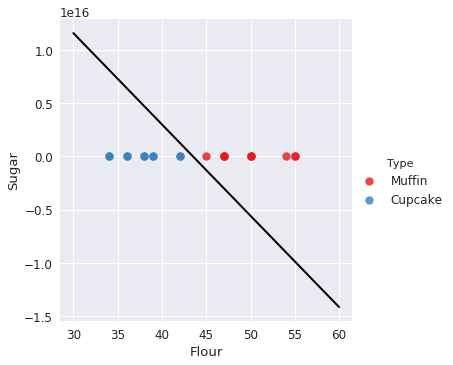

In [14]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

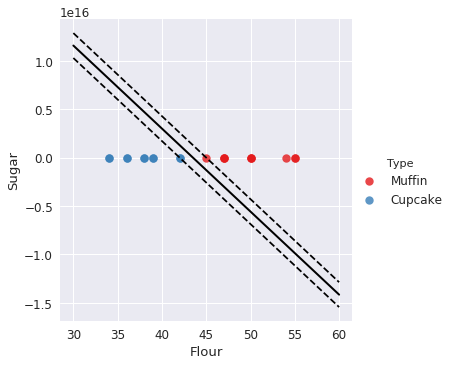

In [18]:
# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

__Step 6:__ Predict New Case

In [19]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [20]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


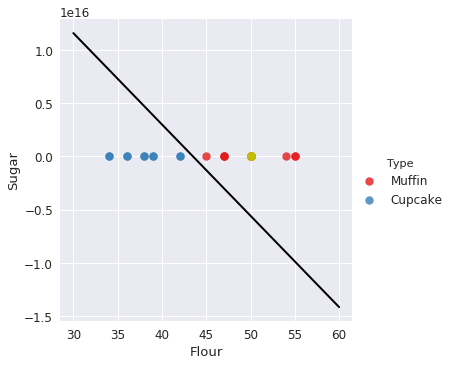

In [21]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');

In [23]:
# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake(43,0)

You're looking at a cupcake recipe!


In [25]:
muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': recipe_features}

In [26]:
muffin_cupcake_dict

{'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt'],
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'muffin_cupcake_model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)}

In [210]:
# Pickle
pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))

In [211]:
# S = String
pickle.dumps(muffin_cupcake_dict)

"(dp0\nS'muffin_cupcake_features'\np1\n(lp2\nS'Flour'\np3\naS'Sugar'\np4\nasS'muffin_cupcake_model'\np5\nccopy_reg\n_reconstructor\np6\n(csklearn.svm.classes\nSVC\np7\nc__builtin__\nobject\np8\nNtp9\nRp10\n(dp11\nS'_impl'\np12\nS'c_svc'\np13\nsS'kernel'\np14\nS'linear'\np15\nsS'verbose'\np16\nI00\nsS'probability'\np17\nI00\nsS'classes_'\np18\ncnumpy.core.multiarray\n_reconstruct\np19\n(cnumpy\nndarray\np20\n(I0\ntp21\nS'b'\np22\ntp23\nRp24\n(I1\n(I2\ntp25\ncnumpy\ndtype\np26\n(S'i8'\np27\nI0\nI1\ntp28\nRp29\n(I3\nS'<'\np30\nNNNI-1\nI-1\nI0\ntp31\nbI00\nS'\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x01\\x00\\x00\\x00\\x00\\x00\\x00\\x00'\np32\ntp33\nbsS'support_'\np34\ng19\n(g20\n(I0\ntp35\ng22\ntp36\nRp37\n(I1\n(I3\ntp38\ng26\n(S'i4'\np39\nI0\nI1\ntp40\nRp41\n(I3\nS'<'\np42\nNNNI-1\nI-1\nI0\ntp43\nbI00\nS'\\x03\\x00\\x00\\x00\\x0b\\x00\\x00\\x00\\x0f\\x00\\x00\\x00'\np44\ntp45\nbsS'dual_coef_'\np46\ng19\n(g20\n(I0\ntp47\ng22\ntp48\nRp49\n(I1\n(I1\nI3\ntp50\ng26\n(S'f8'\np51\nI0\nI1\ntp52